<a href="https://colab.research.google.com/github/mopferman/Project2/blob/main/Wholesale_Customers_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
filename = '/content/Wholesale customers data.csv'

In [5]:
df = pd.read_csv(filename)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
df[df.duplicated(keep = False)]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


In [9]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [10]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


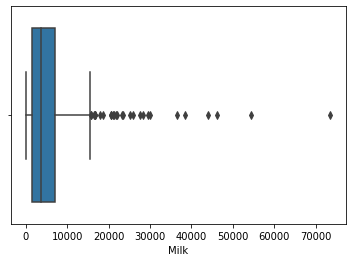

In [11]:
import seaborn as sns
sns.boxplot(df['Milk']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


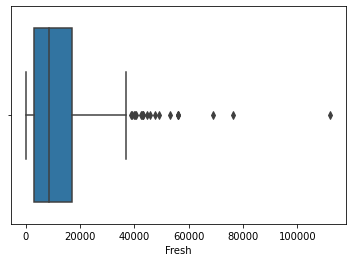

In [12]:
sns.boxplot(df['Fresh']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


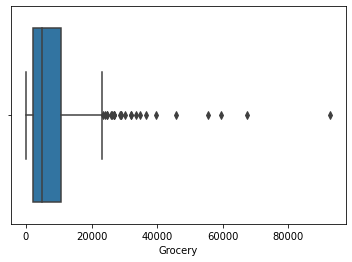

In [13]:
sns.boxplot(df['Grocery']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


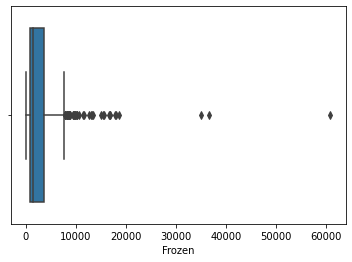

In [14]:
sns.boxplot(df['Frozen']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


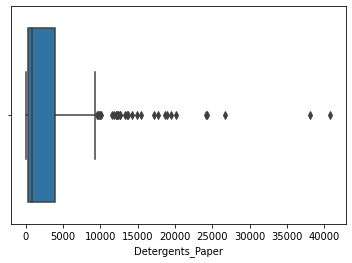

In [15]:
sns.boxplot(df['Detergents_Paper']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


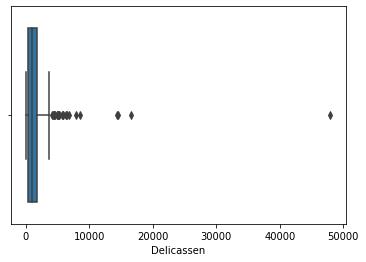

In [16]:
sns.boxplot(df['Delicassen']);

In [17]:
# Removing the outliers
cols = ['Fresh', 'Milk', 'Delicassen', 'Detergents_Paper', 'Frozen', 'Grocery']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
#https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           332 non-null    int64
 1   Region            332 non-null    int64
 2   Fresh             332 non-null    int64
 3   Milk              332 non-null    int64
 4   Grocery           332 non-null    int64
 5   Frozen            332 non-null    int64
 6   Detergents_Paper  332 non-null    int64
 7   Delicassen        332 non-null    int64
dtypes: int64(8)
memory usage: 23.3 KB


After removing the outliers, we went from 440 instances down to 332 instances.

**Visualizations**

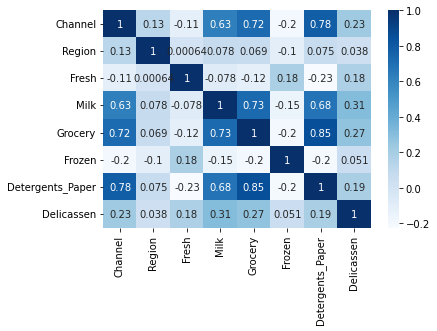

In [19]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot=True)

In [20]:
df['Channel'].value_counts()

1    237
2     95
Name: Channel, dtype: int64

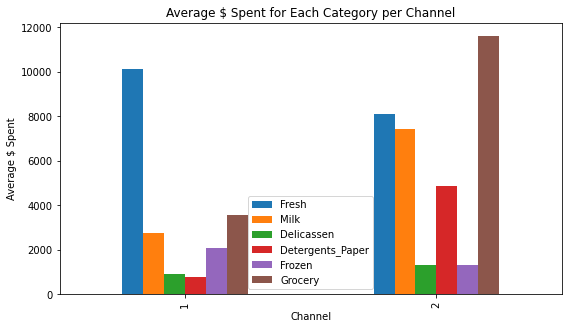

In [21]:
df.groupby('Channel')[cols].mean().plot(kind = 'bar', figsize= (9,5))
plt.title('Average $ Spent for Each Category per Channel')
plt.ylabel('Average $ Spent');

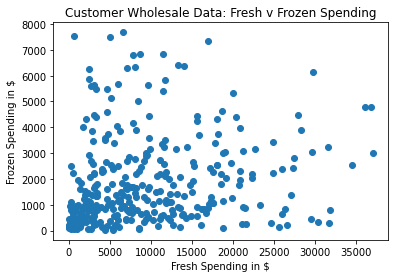

In [22]:
fig, ax = plt.subplots()

ax.scatter(df['Fresh'], df['Frozen'])
ax.set_title('Customer Wholesale Data: Fresh v Frozen Spending')
ax.set_xlabel('Fresh Spending in $')
ax.set_ylabel('Frozen Spending in $');

**Modeling**

In [23]:
X = df.drop('Channel', axis = 1)
y = df['Channel']

In [24]:
y[y == 2] = 0
y[y == 1] = 1
y.head()

0    0
1    0
3    1
5    0
6    0
Name: Channel, dtype: int64

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
logreg = LogisticRegression(C = 1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg.fit(X_train,y_train)
print('Training accuracy:', logreg.score(X_train, y_train))
print('Test accuracy:', logreg.score(X_test, y_test))

Training accuracy: 0.9397590361445783
Test accuracy: 0.8554216867469879


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.9518072289156626
Test accuracy: 0.8795180722891566


In [33]:
from sklearn.ensemble import BaggingClassifier
bt = BaggingClassifier()
bt.fit(X_train, y_train)

print('Training accuracy:', bt.score(X_train, y_train))
print('Test accuracy:', bt.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.8795180722891566


In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('Training accuracy:', rf.score(X_train, y_train))
print('Test accuracy:', rf.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.8554216867469879


In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print('Training accuracy:', xgb.score(X_train, y_train))
print('Testing accuracy:', xgb.score(X_test, y_test))

Training accuracy: 0.9919678714859438
Testing accuracy: 0.8433734939759037


In [38]:
xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

In [39]:
xgb_params = {'lgbmclassifier__n_estimators': [25,45,60,80,100],
               'lgbmclassifier__learning_rate': [0.3,0.5,1],
               'lgbmclassifier__max_depth': [3,4,5,7],
               'lgbmclassifier__subsample': [0.5, 0.7, 1]}

In [41]:
from sklearn.model_selection import GridSearchCV
xgb_gs = GridSearchCV(xgb, xgb_params)

In [43]:
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
y_pred = xgb.predict(X_test)
print("Classification Report for XGBoost")
print(classification_report(y_test, y_pred))

Classification Report for XGBoost
              precision    recall  f1-score   support

           0       0.71      0.74      0.72        23
           1       0.90      0.88      0.89        60

    accuracy                           0.84        83
   macro avg       0.80      0.81      0.81        83
weighted avg       0.85      0.84      0.84        83



In [44]:
xgb_gs.fit(X_train, y_train)
print(xgb_gs.best_params_)

{'lgbmclassifier__learning_rate': 0.3, 'lgbmclassifier__max_depth': 3, 'lgbmclassifier__n_estimators': 25, 'lgbmclassifier__subsample': 0.5}
